In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import imageio

In [2]:
# number of ensembles
n=10

In [9]:
# width of the box
d=200
# number of checkpoints
T=400

# number of particles in each step
N=100

h=int(1.3*T*N/d)

In [10]:
def random_deposition(d,T,N):
    # height of the box
    h=int(1.3*T*N/d)
    ground=np.zeros((h,d))
    heights=[np.zeros(d)]

    for t in range(1,T+1):

        positions = np.random.randint(low=0, high=d, size=N)
        added_height = np.histogram(positions,bins=np.arange(d+1))[0]
        heights.append(added_height+heights[t-1])


        for position in range(d):
            ground[int(heights[t-1][position]):int(heights[t][position]),position]=1+np.floor((t/40)%2)

    return ground, np.array(heights)

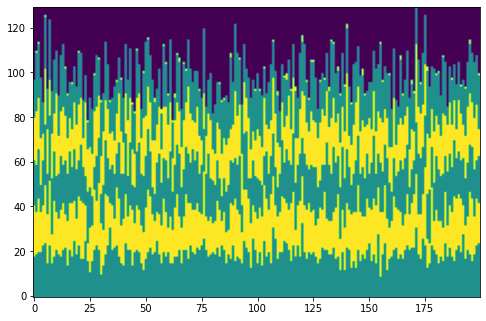

In [15]:
ground, heights = random_deposition(d,200,N)
plt.figure(figsize=(8,8*h/d))
plt.imshow(ground,origin='lower');
plt.savefig('random_deposition.jpg')

In [16]:
std_heights_100=[]
std_heights_200=[]
std_heights_300=[]

for i in tqdm(range(n)):
    # box width = 100'
    ground, heights = random_deposition(100,T,N)
    std_heights_100.append(np.std(heights,axis=1))
    # box width = 200'
    ground, heights = random_deposition(200,T,N)
    std_heights_200.append(np.std(heights,axis=1))
    # box width = 300'
    ground, heights = random_deposition(300,T,N)
    std_heights_300.append(np.std(heights,axis=1))
    
mean_std_100 = np.mean(std_heights_100,axis=0)
mean_std_200 = np.mean(std_heights_200,axis=0)
mean_std_300 = np.mean(std_heights_300,axis=0)

100%|██████████| 10/10 [00:05<00:00,  1.81it/s]


In [17]:

log_t=np.log(np.arange(T)+1)
m1, b1 = np. polyfit(log_t, np.log(mean_std_100[1:]), 1)
m2, b2 = np. polyfit(log_t, np.log(mean_std_200[1:]), 1)
m3, b3 = np. polyfit(log_t, np.log(mean_std_300[1:]), 1)

print(' d = 100 --> slope = ',round(m1,3))
print(' d = 200 --> slope = ',round(m2,3))
print(' d = 300 --> slope = ',round(m3,3))

 d = 100 --> slope =  0.497
 d = 200 --> slope =  0.499
 d = 300 --> slope =  0.494


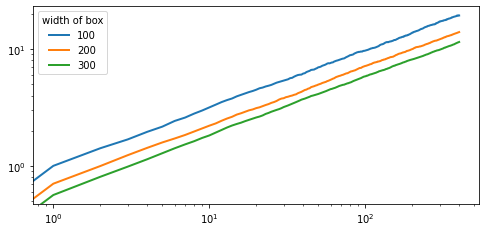

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2, 1, 1)

ax.plot(mean_std_100, label='100', lw=2)
ax.plot(mean_std_200, label='200', lw=2)
ax.plot(mean_std_300, label='300', lw=2)

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend( title="width of box")

in **ballistic deposition** model at the beginning variance of surface level increases with time linearly and then reaches to a saturation value. 

But here, in **random deposition**, there is no saturation value and variance of surface level only increases with time. This is due to the absence of correlation In the growth algorithm between different locations.